# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plot_label="Volume"
sns.set_theme()

# Load datasets

In [2]:
count_df = pd.read_csv("./data/gardiner_count.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
count_df.head()

datetime_bin  volume_15min  number_of_lanes direction   month  \
0  2022-08-11 15:00:00+00:00           160                3         W  August   
1  2022-08-11 15:00:00+00:00           170                3         E  August   
2  2022-08-11 15:00:00+00:00           169                3         E  August   
3  2022-08-11 15:00:00+00:00           123                3         W  August   
4  2022-08-11 15:00:00+00:00           134                3         W  August   

   day day_of_week  hour  minute  dist_from_mid_point  
0   11    Thursday    15       0             4.887837  
1   11    Thursday    15       0             0.474912  
2   11    Thursday    15       0            -0.635254  
3   11    Thursday    15       0            -0.633557  
4   11    Thursday    15       0            -7.665465

In [4]:
print(len(count_df))
print(count_df.datetime_bin.min())
print(count_df.datetime_bin.max())

145099
2022-08-11 15:00:00+00:00
2023-01-01 05:15:00+00:00


In [5]:
weather_df.head()

visibility                collectedAt  temperature  FeelsLike  humidity  \
0        10.0  2022-07-14 12:45:00+00:00        18.69      18.68        79   
1        10.0  2022-07-14 12:51:44+00:00        19.16      19.17        78   
2        10.0  2022-07-14 12:55:27+00:00        19.16      19.17        78   
3        10.0  2022-07-14 13:00:00+00:00        19.38      19.36        76   
4        10.0  2022-07-14 13:05:00+00:00        19.42      19.40        76   

   windSpeed  windDegree  cloudsAll  rain1h  snow1h  ... day  day_of_week  \
0       2.57         340          0     0.0     0.0  ...  14            3   
1       2.57         340          0     0.0     0.0  ...  14            3   
2       2.57         340          0     0.0     0.0  ...  14            3   
3       2.57         340          0     0.0     0.0  ...  14            3   
4       2.57         340          0     0.0     0.0  ...  14            3   

   day_of_week_name hour  minute  cloudy  clear  atmosphere  snowy  rainy  
0          Thursday   12      45       0      1           0      0      0  
1          Thursday   12      51       0      1           0      0      0  
2          Thursday   12      55       0      1           0      0      0  
3          Thursday   13       0       0      1           0      0      0  
4          Thursday   13       5       0      1           0      0      0  

[5 rows x 21 columns]

In [6]:
print(len(weather_df))
print(weather_df.collectedAt.min())
print(weather_df.collectedAt.max())

73535
2022-07-14 12:45:00+00:00
2023-03-26 21:55:00+00:00


# Cast attribute collectedAt to date

In [7]:
count_df["datetime_bin"] = pd.to_datetime(count_df["datetime_bin"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

# Drop expanded date and time attributes
- Will merge the data sets by collectedAt first, then will expand again

In [8]:
count_df.drop(['month','day','day_of_week','hour','minute'],inplace=True,axis=1)
count_df.head()

datetime_bin  volume_15min  number_of_lanes direction  \
0 2022-08-11 15:00:00           160                3         W   
1 2022-08-11 15:00:00           170                3         E   
2 2022-08-11 15:00:00           169                3         E   
3 2022-08-11 15:00:00           123                3         W   
4 2022-08-11 15:00:00           134                3         W   

   dist_from_mid_point  
0             4.887837  
1             0.474912  
2            -0.635254  
3            -0.633557  
4            -7.665465

In [9]:
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute'],inplace=True,axis=1)
weather_df.head()

visibility         collectedAt  temperature  FeelsLike  humidity  \
0        10.0 2022-07-14 12:45:00        18.69      18.68        79   
1        10.0 2022-07-14 12:51:44        19.16      19.17        78   
2        10.0 2022-07-14 12:55:27        19.16      19.17        78   
3        10.0 2022-07-14 13:00:00        19.38      19.36        76   
4        10.0 2022-07-14 13:05:00        19.42      19.40        76   

   windSpeed  windDegree  cloudsAll  rain1h  snow1h  cloudy  clear  \
0       2.57         340          0     0.0     0.0       0      1   
1       2.57         340          0     0.0     0.0       0      1   
2       2.57         340          0     0.0     0.0       0      1   
3       2.57         340          0     0.0     0.0       0      1   
4       2.57         340          0     0.0     0.0       0      1   

   atmosphere  snowy  rainy  
0           0      0      0  
1           0      0      0  
2           0      0      0  
3           0      0      0  
4           0      0      0

# Drop windDegree from weather_df

In [10]:
weather_df.drop("windDegree",inplace=True,axis=1)
weather_df.head()

visibility         collectedAt  temperature  FeelsLike  humidity  \
0        10.0 2022-07-14 12:45:00        18.69      18.68        79   
1        10.0 2022-07-14 12:51:44        19.16      19.17        78   
2        10.0 2022-07-14 12:55:27        19.16      19.17        78   
3        10.0 2022-07-14 13:00:00        19.38      19.36        76   
4        10.0 2022-07-14 13:05:00        19.42      19.40        76   

   windSpeed  cloudsAll  rain1h  snow1h  cloudy  clear  atmosphere  snowy  \
0       2.57          0     0.0     0.0       0      1           0      0   
1       2.57          0     0.0     0.0       0      1           0      0   
2       2.57          0     0.0     0.0       0      1           0      0   
3       2.57          0     0.0     0.0       0      1           0      0   
4       2.57          0     0.0     0.0       0      1           0      0   

   rainy  
0      0  
1      0  
2      0  
3      0  
4      0

# Merge flow and weather dataframes

In [14]:
df = count_df.merge(weather_df,left_on="datetime_bin",right_on="collectedAt",how="inner")
df.head()

datetime_bin  volume_15min  number_of_lanes direction  \
0 2022-08-12 01:30:00           229                3         E   
1 2022-08-12 01:30:00           310                3         W   
2 2022-08-12 01:30:00           211                3         E   
3 2022-08-12 01:30:00           194                3         W   
4 2022-08-12 01:30:00           291                3         W   

   dist_from_mid_point  visibility         collectedAt  temperature  \
0             0.474912        10.0 2022-08-12 01:30:00        19.59   
1            -0.974751        10.0 2022-08-12 01:30:00        19.59   
2             3.825265        10.0 2022-08-12 01:30:00        19.59   
3            -0.633557        10.0 2022-08-12 01:30:00        19.59   
4             3.821697        10.0 2022-08-12 01:30:00        19.59   

   FeelsLike  humidity  windSpeed  cloudsAll  rain1h  snow1h  cloudy  clear  \
0      19.04        55       5.14          0     0.0     0.0       0      1   
1      19.04        55       5.14          0     0.0     0.0       0      1   
2      19.04        55       5.14          0     0.0     0.0       0      1   
3      19.04        55       5.14          0     0.0     0.0       0      1   
4      19.04        55       5.14          0     0.0     0.0       0      1   

   atmosphere  snowy  rainy  
0           0      0      0  
1           0      0      0  
2           0      0      0  
3           0      0      0  
4           0      0      0

In [15]:
len(df)

145080

# Plot correlations
- Between speed, visibility, temperature, humidity, wind speed, cloudiness and precipitation

In [16]:
data_to_correlate = df[["volume_15min","visibility","temperature","humidity","windSpeed","cloudsAll","rain1h","snow1h"]]
corr_mat = data_to_correlate.corr()

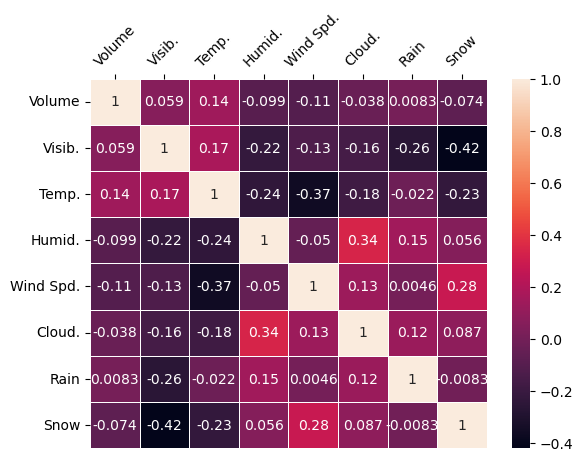

In [17]:
labels=["Volume", "Visib.", "Temp.", "Humid.", "Wind Spd.", "Cloud.", "Rain", "Snow"]

ax = sns.heatmap(corr_mat.to_numpy(),annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/051_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/051_correlations.png", bbox_inches="tight")

# Expand date and time
- Also remove collectedAt

In [18]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["day"] = df.collectedAt.dt.day
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.drop("datetime_bin",inplace=True,axis=1)
df.head()

volume_15min  number_of_lanes direction  dist_from_mid_point  visibility  \
0           229                3         E             0.474912        10.0   
1           310                3         W            -0.974751        10.0   
2           211                3         E             3.825265        10.0   
3           194                3         W            -0.633557        10.0   
4           291                3         W             3.821697        10.0   

   temperature  FeelsLike  humidity  windSpeed  cloudsAll  ...  cloudy  clear  \
0        19.59      19.04        55       5.14          0  ...       0      1   
1        19.59      19.04        55       5.14          0  ...       0      1   
2        19.59      19.04        55       5.14          0  ...       0      1   
3        19.59      19.04        55       5.14          0  ...       0      1   
4        19.59      19.04        55       5.14          0  ...       0      1   

   atmosphere  snowy  rainy  month  day  day_of_week  hour  minute  
0           0      0      0      8   12            4     1      30  
1           0      0      0      8   12            4     1      30  
2           0      0      0      8   12            4     1      30  
3           0      0      0      8   12            4     1      30  
4           0      0      0      8   12            4     1      30  

[5 rows x 22 columns]

# Onehot encode categorical attributes
- Also cast all fields to float32

In [19]:
categorical_attrs = ["direction", "month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

volume_15min  number_of_lanes  dist_from_mid_point  visibility  \
0         229.0              3.0             0.474912        10.0   
1         310.0              3.0            -0.974751        10.0   
2         211.0              3.0             3.825265        10.0   
3         194.0              3.0            -0.633557        10.0   
4         291.0              3.0             3.821697        10.0   

   temperature  FeelsLike  humidity  windSpeed  cloudsAll  rain1h  ...  \
0        19.59  19.040001      55.0       5.14        0.0     0.0  ...   
1        19.59  19.040001      55.0       5.14        0.0     0.0  ...   
2        19.59  19.040001      55.0       5.14        0.0     0.0  ...   
3        19.59  19.040001      55.0       5.14        0.0     0.0  ...   
4        19.59  19.040001      55.0       5.14        0.0     0.0  ...   

   month_10  month_11  month_12  day_of_week_0  day_of_week_1  day_of_week_2  \
0       0.0       0.0       0.0            0.0            0.0            0.0   
1       0.0       0.0       0.0            0.0            0.0            0.0   
2       0.0       0.0       0.0            0.0            0.0            0.0   
3       0.0       0.0       0.0            0.0            0.0            0.0   
4       0.0       0.0       0.0            0.0            0.0            0.0   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  
0            0.0            1.0            0.0            0.0  
1            0.0            1.0            0.0            0.0  
2            0.0            1.0            0.0            0.0  
3            0.0            1.0            0.0            0.0  
4            0.0            1.0            0.0            0.0  

[5 rows x 34 columns]

# Split data set into train and test

In [21]:
X = transformed_df.drop("volume_15min",axis=1)
y = transformed_df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

# Run ML tasks

## Regression

### Linear Regression Cuda

Fitting model...
Fitting model... OK! Took 0.14981746673583984 seconds

model Linear Regression
r2 0.35365957021713257
mae 257.66229248046875
mse 100341.1484375
rmse 316.7667236328125
mape 5575402000000000.0
time_to_fit 0.14981746673583984
time_to_predict 0.02147507667541504

Dumping model...
Dumping model... OK! Took 0.0022039413452148438 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


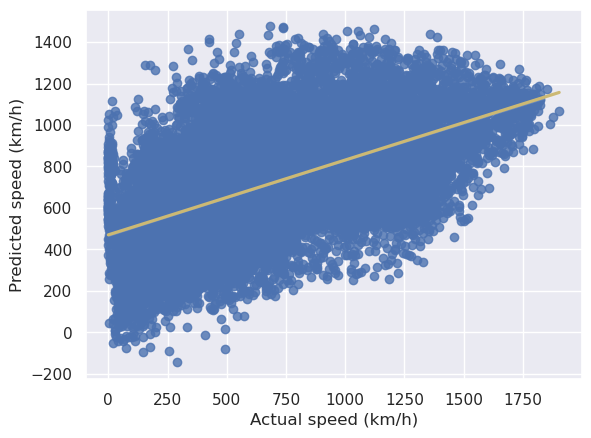

In [23]:
from sklearn.linear_model import LinearRegression

file_name = "051_linear_regression"
model_name = "Linear Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LinearRegression(), X_train, X_val, y_train, y_val, plot_label)

### Logistic Regression Cuda

Fitting model...
Fitting model... OK! Took 1.959040880203247 seconds

model Logistic Regression
r2 0.05477243661880493
mae 265.4358825683594
mse 146741.90625
rmse 383.0690612792969
mape 1471709900000000.0
time_to_fit 1.959040880203247
time_to_predict 0.032683372497558594

Dumping model...
Dumping model... OK! Took 0.012997627258300781 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


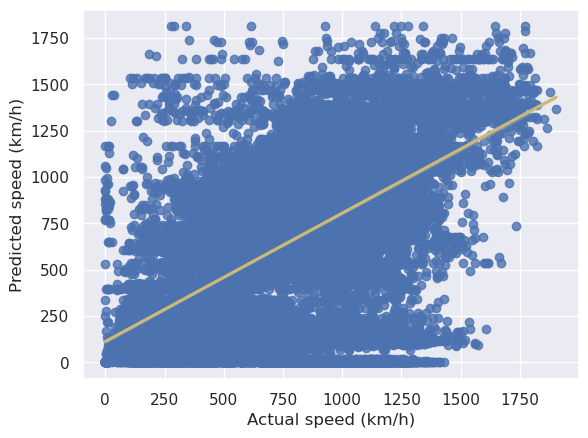

In [24]:
from sklearn.linear_model import LogisticRegression

file_name = "051_logistic_regression"
model_name = "Logistic Regression"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, LogisticRegression(), X_train, X_val, y_train, y_val, plot_label)

### Lasso Cuda

Fitting model...
Fitting model... OK! Took 0.07801461219787598 seconds

model Lasso
r2 0.3536800742149353
mae 258.26806640625
mse 100337.96875
rmse 316.7616882324219
mape 5541303000000000.0
time_to_fit 0.07801461219787598
time_to_predict 0.016893386840820312

Dumping model...
Dumping model... OK! Took 0.002251863479614258 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


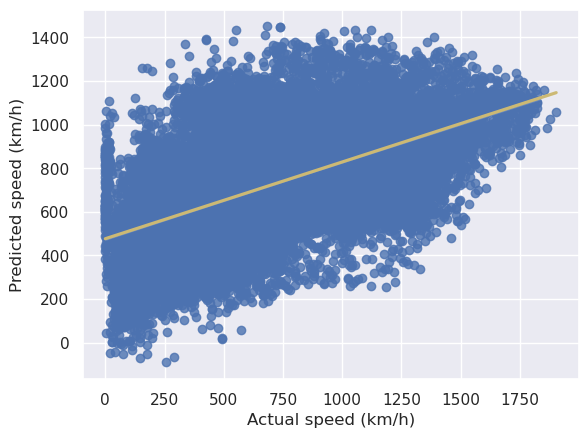

In [25]:
from sklearn.linear_model import Lasso

file_name = "051_lasso"
model_name = "Lasso"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, Lasso(), X_train, X_val, y_train, y_val, plot_label)

### Elastic Net Cuda

Fitting model...
Fitting model... OK! Took 0.06445980072021484 seconds

model Elastic Net
r2 0.30054980516433716
mae 275.1811218261719
mse 108586.171875
rmse 329.524169921875
mape 5536112400000000.0
time_to_fit 0.06445980072021484
time_to_predict 0.019054174423217773

Dumping model...
Dumping model... OK! Took 0.0024492740631103516 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


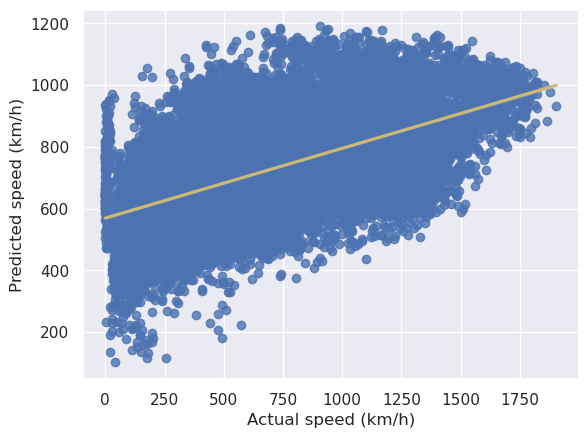

In [26]:
from sklearn.linear_model import ElasticNet

file_name = "051_elastic_net"
model_name = "Elastic Net"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, ElasticNet(), X_train, X_val, y_train, y_val, plot_label)

### Random Forest Cuda

Fitting model...
Fitting model... OK! Took 8.51169729232788 seconds

model Random Forest
r2 0.9362239241600037
mae 63.331878662109375
mse 9900.9228515625
rmse 99.50337982177734
mape 2152245800000000.0
time_to_fit 8.51169729232788
time_to_predict 0.39476895332336426

Dumping model...
Dumping model... OK! Took 9.540167570114136 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


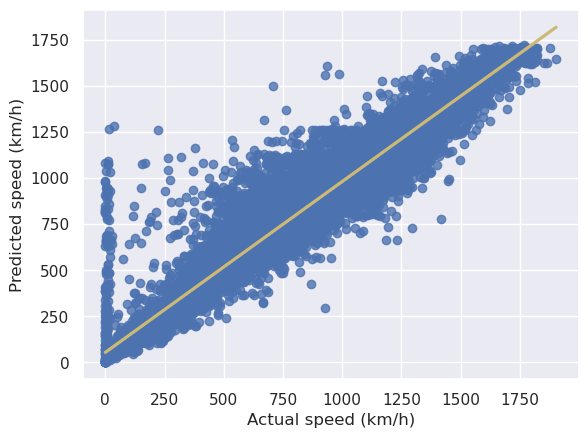

In [27]:
from sklearn.ensemble import RandomForestRegressor

file_name = "051_random_forest"
model_name = "Random Forest"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(), X_train, X_val, y_train, y_val, plot_label)

### Decision Tree

Fitting model...
Fitting model... OK! Took 0.8709309101104736 seconds

model Decision Tree
r2 0.9315315028732386
mae 59.95161290322581
mse 10629.39405845051
rmse 103.09895275147323
mape 2023950204746046.0
time_to_fit 0.8709309101104736
time_to_predict 0.01906752586364746

Dumping model...
Dumping model... OK! Took 2.1312472820281982 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


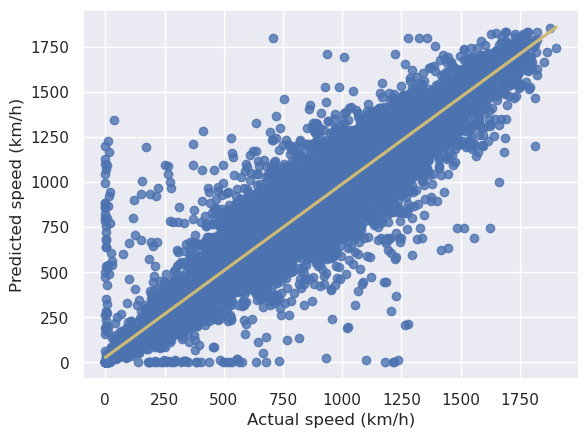

In [28]:
from sklearn.tree import DecisionTreeRegressor

file_name = "051_decision_tree"
model_name = "Decision Tree"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(), X_train, X_val, y_train, y_val, plot_label)

### XGBoost

Fitting model...
Fitting model... OK! Took 0.5476469993591309 seconds

model XGBoost
r2 0.9432202592610627
mae 65.28769
mse 8814.772
rmse 93.88702
mape 2618876000000000.0
time_to_fit 0.5476469993591309
time_to_predict 0.033838510513305664

Dumping model...
Dumping model... OK! Took 0.0589442253112793 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


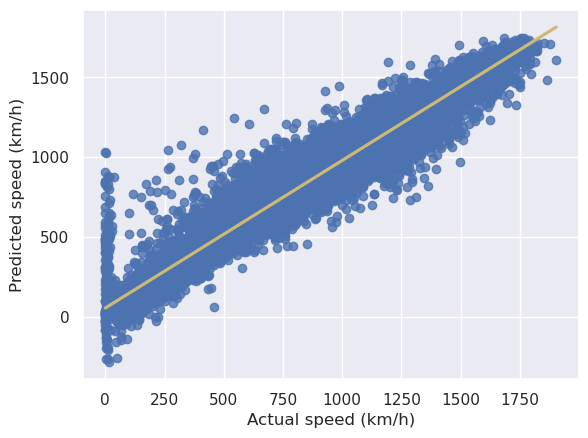

In [29]:
import xgboost as xgb

file_name = "051_xgboost"
model_name = "XGBoost"

xgb_params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**xgb_params), X_train, X_val, y_train, y_val, plot_label)

### MLP

Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 100.54791951179504 seconds

model MLP
r2 0.8075679565460466
mae 129.0796
mse 29874.117
rmse 172.84131
mape 5580620700000000.0
time_to_fit 100.54791951179504
time_to_predict 0.026862144470214844

Dumping model...
Dumping model... OK! Took 0.009244203567504883 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


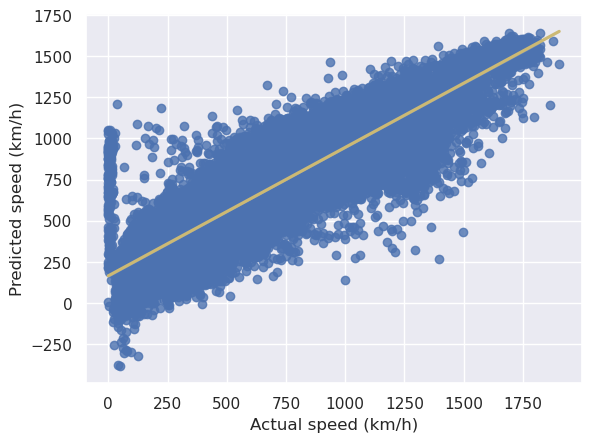

In [30]:
from sklearn.neural_network import MLPRegressor

file_name = "051_mlpr"
model_name = "MLP"

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(), X_train, X_val, y_train, y_val, plot_label)